In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mataura pf
jamestown sh
rikitea pf
hobart au
saint-philippe re
talcahuano cl
attawapiskat ca
punta arenas cl
atuona pf
flin flon ca
vostok ru
taolanaro mg
port keats au
kapaa us
nizhnyaya omka ru
samusu ws
ushuaia ar
samarai pg
teya ru
nikolskoye ru
jamestown sh
port alfred za
amderma ru
albany au
smithers ca
saldanha za
rikitea pf
punta arenas cl
islamkot pk
sola vu
mataura pf
butaritari ki
lebu cl
hermanus za
barrow us
provideniya ru
vestmannaeyjar is
aguas belas br
beira mz
viking ca
turukhansk ru
amderma ru
hithadhoo mv
esil kz
qaanaaq gl
bluff nz
mataura pf
tasiilaq gl
mareeba au
busselton au
vaini to
mahebourg mu
bengkulu id
kangaatsiaq gl
bredasdorp za
farafangana mg
nikolskoye ru
mountain home us
ushuaia ar
dingle ie
rikitea pf
atuona pf
albany au
taolanaro mg
rikitea pf
carnarvon au
ushuaia ar
krasnoselkup ru
laguna br
codrington ag
chokurdakh ru
albany au
jamestown sh
cherskiy ru
arraial do cabo br
ushuaia ar
xunchang cn
bengkulu id
vaini to
saint-philippe re
kysyl-syr ru
pun

shelburne ca
ushuaia ar
kaitangata nz
port alfred za
kota belud my
castro cl
gat ly
busselton au
provideniya ru
luzhou cn
punta arenas cl
constitucion mx
kihei us
castro cl
illoqqortoormiut gl
taolanaro mg
saleaula ws
attawapiskat ca
bethel us
illoqqortoormiut gl
qaanaaq gl
kavaratti in
belushya guba ru
jamestown sh
suntar ru
port alfred za
moranbah au
vaini to
tuktoyaktuk ca
dubai ae
rikitea pf
hanzhong cn
ushuaia ar
honiara sb
sitka us
atuona pf
el badari eg
kenora ca
pundaguitan ph
longyearbyen sj
tabiauea ki
san juan de los morros ve
hithadhoo mv
seymchan ru
fomboni km
taolanaro mg
taltal cl
concarneau fr
ushuaia ar
itaqui br
sabang id
de aar za
avarua ck
kabo cf
provideniya ru
attawapiskat ca
bengkulu id
pangani tz
pevek ru
morgan city us
rikitea pf
hilo us
yellowknife ca
khatanga ru
hobart au
paragominas br
palma soriano cu
barentsburg sj
mataura pf
chicama pe
taolanaro mg
lyuban by
bara sd
saryshagan kz
vaini to
rikitea pf
fornosovo ru
hofn is
los llanos de aridane es
albany au


saldanha za
mataura pf
busselton au
norman wells ca
el seibo do
cape town za
sakakah sa
puerto ayora ec
ola ru
karasburg na
rikitea pf
hermanus za
guerrero negro mx
yellowknife ca
khatanga ru
port pirie au
saldanha za
avarua ck
mataura pf
saldanha za
te anau nz
jamestown sh
cape town za
bluff nz
albany au
ushuaia ar
iqaluit ca
punta arenas cl
salalah om
mendeleyevsk ru


In [7]:
# Import the requests library
import requests 

# Import the API key
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=cImperial&APPID=" + weather_api_key 
print(url)

http://api.openweathermap.org/data/2.5/weather?units=cImperial&APPID=6c1f9ea901c21039b6fb5fcba814d73b


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | talcahuano
Processing Record 7 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | flin flon
Processing Record 11 of Set 1 | vostok
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | port keats
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | nizhnyaya omka
Processing Record 16 of Set 1 | samusu
City not found. Skipping...
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | samarai
Processing Record 19 of Set 1 | teya
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | por

Processing Record 42 of Set 4 | pangody
Processing Record 43 of Set 4 | sainte-suzanne
Processing Record 44 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 45 of Set 4 | yuli
Processing Record 46 of Set 4 | rocha
Processing Record 47 of Set 4 | rio grande
Processing Record 48 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 4 | geraldton
Processing Record 50 of Set 4 | nobres
Processing Record 1 of Set 5 | zafra
Processing Record 2 of Set 5 | kuybyshevo
Processing Record 3 of Set 5 | duz
City not found. Skipping...
Processing Record 4 of Set 5 | holoby
Processing Record 5 of Set 5 | valentin gomez farias
Processing Record 6 of Set 5 | east london
Processing Record 7 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 8 of Set 5 | kaitangata
Processing Record 9 of Set 5 | port macquarie
Processing Record 10 of Set 5 | esperance
Processing Record 11 of Set 5 | nuuk
Processing Record 12 of Set 5 | filingue
Processing Record 13 of Set

Processing Record 30 of Set 8 | morgan city
Processing Record 31 of Set 8 | paragominas
Processing Record 32 of Set 8 | palma soriano
Processing Record 33 of Set 8 | bara
Processing Record 34 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 35 of Set 8 | fornosovo
Processing Record 36 of Set 8 | hofn
Processing Record 37 of Set 8 | los llanos de aridane
Processing Record 38 of Set 8 | stony plain
Processing Record 39 of Set 8 | waddan
Processing Record 40 of Set 8 | tautira
Processing Record 41 of Set 8 | ambagarh chauki
Processing Record 42 of Set 8 | fairbanks
Processing Record 43 of Set 8 | vanimo
Processing Record 44 of Set 8 | neuquen
Processing Record 45 of Set 8 | ilulissat
Processing Record 46 of Set 8 | sarkand
Processing Record 47 of Set 8 | oyama
Processing Record 48 of Set 8 | la paz
Processing Record 49 of Set 8 | chapais
Processing Record 50 of Set 8 | sioux lookout
Processing Record 1 of Set 9 | chuy
Processing Record 2 of Set 9 | te anau
Processing Re

Processing Record 17 of Set 12 | narsaq
Processing Record 18 of Set 12 | caborca
Processing Record 19 of Set 12 | homer
Processing Record 20 of Set 12 | pangkalanbuun
Processing Record 21 of Set 12 | inhumas
Processing Record 22 of Set 12 | starotimoshkino
Processing Record 23 of Set 12 | ozgon
City not found. Skipping...
Processing Record 24 of Set 12 | tilichiki
Processing Record 25 of Set 12 | luba
Processing Record 26 of Set 12 | ugoofaaru
Processing Record 27 of Set 12 | visby
Processing Record 28 of Set 12 | kassala
Processing Record 29 of Set 12 | bubaque
Processing Record 30 of Set 12 | muroto
Processing Record 31 of Set 12 | arlit
Processing Record 32 of Set 12 | lichuan
Processing Record 33 of Set 12 | tumut
Processing Record 34 of Set 12 | saint-joseph
Processing Record 35 of Set 12 | hirara
Processing Record 36 of Set 12 | ocos
Processing Record 37 of Set 12 | namatanai
Processing Record 38 of Set 12 | manta
Processing Record 39 of Set 12 | odessa
Processing Record 40 of Se

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,282.03,68,100,2.14,NZ,2021-08-05 02:24:09
1,Jamestown,42.0970,-79.2353,291.77,77,66,0.89,US,2021-08-05 02:21:19
2,Rikitea,-23.1203,-134.9692,295.95,71,7,7.65,PF,2021-08-05 02:24:09
3,Hobart,-42.8794,147.3294,286.49,68,75,5.14,AU,2021-08-05 02:21:16
4,Saint-Philippe,-21.3585,55.7679,292.90,79,80,6.88,RE,2021-08-05 02:24:10
5,Talcahuano,-36.7167,-73.1167,284.97,82,90,5.14,CL,2021-08-05 02:24:11
6,Punta Arenas,-53.1500,-70.9167,279.21,81,0,3.60,CL,2021-08-05 02:24:11
7,Atuona,-9.8000,-139.0333,298.59,65,1,4.40,PF,2021-08-05 02:24:11
8,Flin Flon,54.7682,-101.8650,292.98,41,19,2.71,CA,2021-08-05 02:24:12
9,Vostok,46.4856,135.8833,298.89,65,28,1.72,RU,2021-08-05 02:24:12


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-08-05 02:24:09,-46.1927,168.8643,282.03,68,100,2.14
1,Jamestown,US,2021-08-05 02:21:19,42.0970,-79.2353,291.77,77,66,0.89
2,Rikitea,PF,2021-08-05 02:24:09,-23.1203,-134.9692,295.95,71,7,7.65
3,Hobart,AU,2021-08-05 02:21:16,-42.8794,147.3294,286.49,68,75,5.14
4,Saint-Philippe,RE,2021-08-05 02:24:10,-21.3585,55.7679,292.90,79,80,6.88
5,Talcahuano,CL,2021-08-05 02:24:11,-36.7167,-73.1167,284.97,82,90,5.14
6,Punta Arenas,CL,2021-08-05 02:24:11,-53.1500,-70.9167,279.21,81,0,3.60
7,Atuona,PF,2021-08-05 02:24:11,-9.8000,-139.0333,298.59,65,1,4.40
8,Flin Flon,CA,2021-08-05 02:24:12,54.7682,-101.8650,292.98,41,19,2.71
9,Vostok,RU,2021-08-05 02:24:12,46.4856,135.8833,298.89,65,28,1.72


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

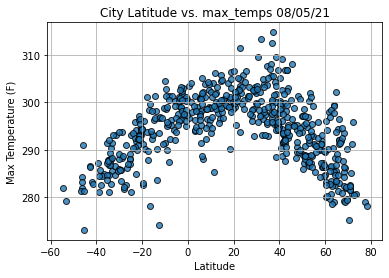

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. max_temps "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


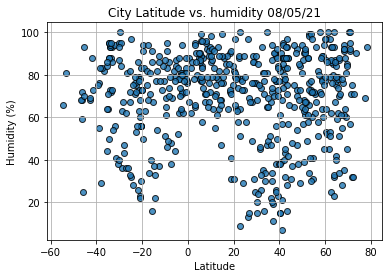

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


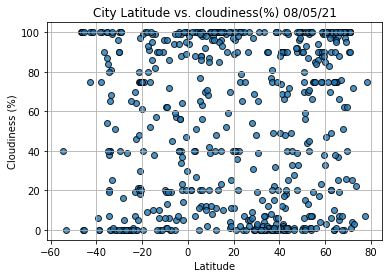

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()


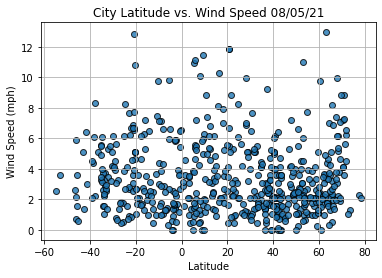

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()